<a href="https://colab.research.google.com/github/soyeunju/ESAA/blob/main/ESAA_1004_Week5_assignment_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 분류

## 분류의 개요 (Classification)

지도학습은 정답이 있는 데이터가 있는 상태에서 학습하는 머신러닝 방식. 지도학습의 대표적인 유형인 분류는 학습 데이터로 주어진 데이터의 피처와 레이블값(결정 값, 클래스 값)을 머신러닝 알고리즘으로 학습해 모델을 생성하고, 이렇게 생성된 모델에 새로운 데이터값이 주어졌을 때 미지의 레이블 값을 예측하는 것임.

분류는 다양한 머신러닝 알고리즘으로 구현 가능
* 베이즈(Bayes) 통계와 생성 모델에 기반한 나이브 베이즈(Naive Bayes)
* 독립변수와 종속변수의 선형 관계성에 기반한 로지스틱 회귀(Logistic Regression)
* 데이터 균일도에 따른 규칙 기반의 결정 트리(Decision Tree)
* 개별 클래스 간의 최대 분류 마진을 효과적으로 찾아주는 서포트 벡터 머신(Support Vector Machine)
* 근접 거리를 기준으로 하는 최소 근접(Nearest Neighbor) 알고리즘
* 심층 연결 기반의 신경망(Neural Network)
* **서로 다른(또는 같은) 머신러닝 알고리즘을 결합한 앙상블(Ensemble)**

앙상블은 정형 데이터의 예측 분석 영역에서 매우 높은 예측 성능으로 인해 많은 분석가와 데이터 과학자들에게 사용. 앙상블은 서로 다른/또는 같은 알고리즘을 단순히 결합한 형태도 있으나, 일반적으로는 배깅(Bagging)과 부스팅(Boosting) 방식으로 나뉨.

배깅 방식의 대표인 랜덤 포레스트(Random Forest)는 뛰어난 예측 성능, 상대적으로 빠른 수행 시간, 유연성 등으로 많은 분석가가 애용하는 알고리즘.

부스팅의 효시라고 할 수 있는 그래디언트 부스팅(Gradient Boosting)의 경우 뛰어난 예측 성능을 가지고 있지만, 수행 시간이 너무 오래 걸리는 단점으로 인해 최적화 모델 튜닝이 어려웠음.

XgBoost(eXtra Gradient Boost)와 LightGBM 등 기존 그래디언트 부스팅의 예측 성능을 한 단계 발전시키면서도 수행 시간을 단축시킨 알고리즘이 계속 등장하면서 정형 데이터의 분류 영역에서 가장 활용도가 높은 알고리즘으로 자리잡음.

## 결정트리(Decision Tree)

결정 트리(Decision Tree)는 ML 알고리즘 중 직관적으로 이해하기 쉬운 알고리즘. 데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리(Tree) 기반의 분류 규칙을 만드는 것.
**데이터의 어떤 기준을 바탕으로 규칙을 만들어야 가장 효율적인 분류가 될 것인가가 알고리즘의 성능을 크게 좌우**

규칙노드(Decision Node) : 규칙 조건

리프노드(Leaf Node) : 결정된 클래스 값

새로운 규칙조건을 만들때마다 서브트리(Sub Tree) 생성.

규칙이 많을수록 과적합으로 이어질 가능성이 있음. 가능한 적은 결정노드로 높은 예측 정확도를 가지려면 데이터를 분류할 때 최대한 많은 데이터 세트가 해당 분류에 속할 수 있도록(최대한 균일한 데이터 세트를 구성할 수 있도록) 결정 노드의 규칙이 정해져야 함(Split). 데이터 세트의 균일도는 데이터를 구분하는데 필요한 정보의 양에 영향을 미침. 결정 노드는 정보 균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만듬.

<데이터 균일도 측정>

엔트로피를 이용한 정보 이득(Information Gain) 지수:  **1 - 엔트로피지수** 엔트로피는 주어진 데이터 집합의 혼잡도를 의미. 결정트리는 이 정보 이득이 높은 속성을 기준으로 분할

지니계수 : **0**이 가장 평등(균일도 높음), **1**로 갈수록 불평등(균일도 낮음). 결정트리는 지니계수가 낮은 속성을 기준으로 분할.

## 결정 트리 모델의 특징

결정 트리의 가장 큰 장점은 정보의 **균일도**라는 룰을 기반으로 하고 있어서 알고리즘이 쉽고 직관적이 라는 점. 정보의 균일도만 신경 쓰면 되므로 특별한 경우를 제외하고는 각 피처의 스케일링과 정규화 같은 전처리 작업이 필요 없음.

가장 큰 단점은 과적합으로 정확도가 떨어진다는 점. 피처 정보의 균일도에 따른 룰 규칙으로 서브 트리를 계속 만들다 보면 피처가 많고 균일도가 다양하게 존재할수록 트리의 깊이가 커지고 복잡해질 수밖에 없음. 이는 결국에는 실제 상황에(테 스트 데이터 세트) 유연하게 대처할 수 없어서 예측 성능이 떨어질 수밖에 없음. -> 트리의 크기 사전에 제한하는 튜닝

## 결정 트리 파라미터

사이킷런은 결정 트리 알고리즘을 구현한 DecisionTreeClassifer(분류를 위한 클래스), DecisionTreeRegressor(회귀를 위한 클래스)를 제공. 이는 CART(Classification And Regression Trees) 알고리즘 기반. 둘은 아래와 같은 동일한 파라미터를 사용.

* min_samples_split : 노드를 분류하기 위한 최소한의 샘플 데이터 수. 과적합 제어를 위해 사용. 디폴트 2.
* min_samples_leaf : 분할이 된 경우, 왼쪽과 오른쪽이 가져야 할 최소한의 데이터 수. 큰 값으로 설정시 노드 분할 덜 수행. 과적합 제어. 비대칭적 데이터의 경우, 작게 설정.
* max_features : 최적의 분할을 위해 고려해야할 최대 피처 개수. 디폴트 None(모든 피처 고려). 'int'(대상 피처 개수), 'float'(전체 피처 개수 중 대상 피처 비율), 'sqrt'(전체 피처 중 sqrt(전체 피처 개수)), 'auto'(sqrt와 동일), 'log'(전체 피처 중 log2(전체 피처 개수))
* max_depth : 트리의 최대 깊이. 디폴트 None. 과적합 방지.
* max_leaf_nodes : 밑단 노드(leaf)의 최대 개수

## 결정 트리 모델의 시각화

Graphviz 패키지를 통해 결정 트리 알고리즘이 어떠한 규칙을 사용하는지 시각적으로 파악할 수 있음. 사이킷런은 export_graphviz() API를 제공.

사이킷런의 export_graphviz()는 함수 인자로 학습이 완료된 **Estimator, 피처의 이름 리스트, 레이블 이름 리스트**를 입력하면 학습된 결정 트리 규칙을 실제 트리 형태로 시각화해 보여줌.



In [ ]:
%pip install pydot==2.0.0

Note: you may need to restart the kernel to use updated packages.


In [ ]:
!pip install graphviz

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTreeClassifer 생성
dt_clf = DecisionTreeClassifier(random_state = 156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 세트로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data,iris_data.target, test_size = 0.2, random_state = 11)

# DecisionTreeClassifer 학습
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=156)

In [ ]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함.
export_graphviz(dt_clf,out_file = 'tree.dot',class_names = iris_data.target_names, feature_names = iris_data.feature_names, impurity = True, filled = True)

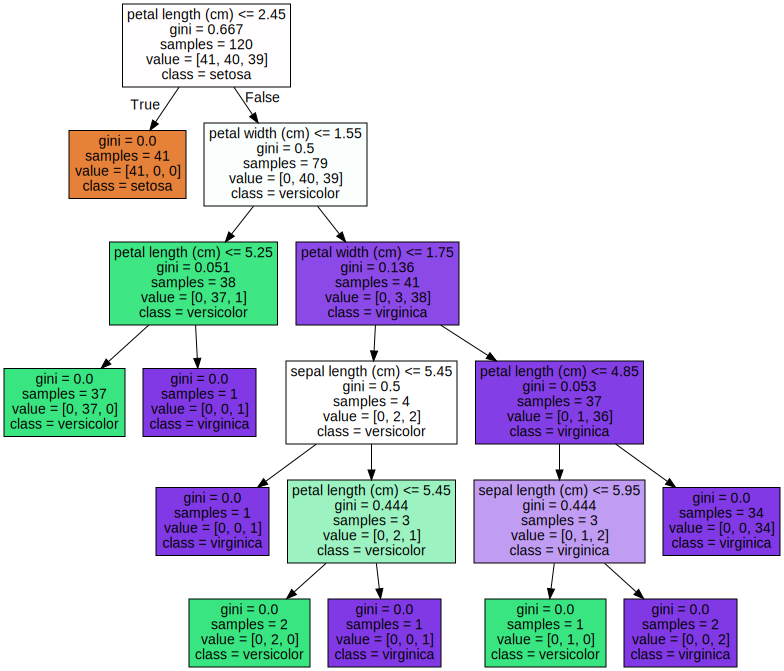

In [ ]:
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 주피터 노트북상에서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

해석

더 이상 자식 노드가 없는 노드는 리프 노드. 리프 노드는 최종 클래스(레이블) 값이 결정되는 노드. 리프 노드가 되려면 오직 하나의 클래스 값으로 최종 데이터가 구성되거나 리프 노드가 될 수 있는 하이퍼 파라미터 조건을 충족. 자식 노드가 있는 노드는 브랜치 노드이며, 자식 노드를 만들기 위한 분할 조건 규칙을 가지고 있음.

* petal length(cm)〈= 2.45와 같이 피처의 조건이 있는 것은 자식 노드를 만들기 위한 규칙 조건. 이 조건이 없으면 리프 노드.
* gini는 다음의 valued [ ]로 주어진 데이터 분포에서의 지니 계수.
* samples는 현 규칙에 해당하는 데이터 건수.
* value=[ ]는 클래스값 기반의 데이터 건수.붓꽃 데이터 세트는 클래스 값으로 0,1.2를 가지고 있으며, 0: Setosa, 1:Versicolor, 2:Virginica 품종을 가리킴. 만일 Value =[41,40,39]라면 클래스 값의 순서로 Setosa 41개, Versicolor 40개, Virginica 39개로 데이터가 구성돼 있다는 의미.

각 노드의 색깔은 붓꽃 데이터의 레이블 값을 의미. 색깔이 짙어질수록 지니 계수가 낮고 해당 레이블에 속하는 샘플 데이터가 많다는 의미. 이처럼 결정 트리는 규칙 생성 로직을 미리 제어하지 않으면 완벽하게 클래스 값을 구별해내기 위해 트리 노드를 계속해서 만들어 감.

max_depth(결정 트리의 최대 깊이 제어) 파라미터 변경에 따른 트리 변화 -> 3개로 조정시 더 간단한 결정 트리 형성
min_samples_split(자식 규칙 노드를 분할해 만들기 위한 최소한의 샘플 데이터 개수) 파라미터 변경에 따른 트리 변화 -> 4로 조정시 더 이상 자식 규칙 노드를 위한 노드를 분할을 하지 않고 리프 노드가 됨.
min_samples_leaf(분할될 경우 왼쪽과 오른쪽 자식 노드 각각이 가지게 될 최소 데이터 건수를 지정) 파라미터 변경에 따른 트리 변화 -> 4로 조정시 해당 조건을 만족시키기 어려워지게 됨에 따라 상대적으로 적은 횟수로 분할을 수행(리프 조건이 될 수 있는 조건이 상대적으로 완화)


사이킷런은 피처의 중요한 역할 지표를 DecisionTreeClassifier 객체의 feature_importances_ 속성 으로 제공. feature_importances_는 ndarray 형태로 값을 반환하며 피처 순서대로 값을 할당. feature_importances_ 는 피처가 트리 분할 시 정보 이득이나 지니 계수를 얼마나 효율적으로 잘 개선시켰는지를 정규화된 값으로 표현한 것.


Feature Importances :
[0.025 0.    0.555 0.42 ]
sepal length (cm): 0.025
sepal width (cm): 0.000
petal length (cm): 0.555
petal width (cm): 0.420


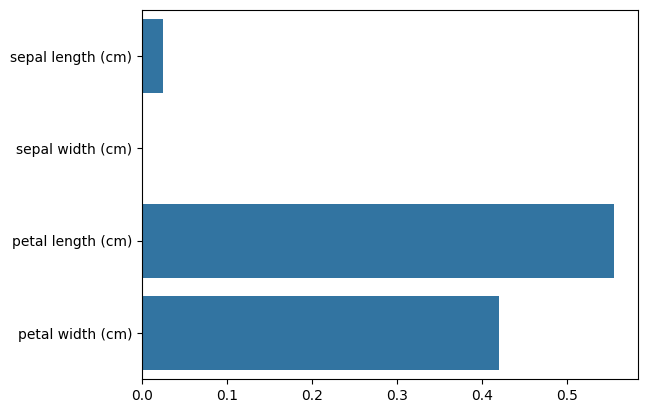

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# to ensure that Matplotlib plots are displayed directly within the notebook

# feature_importances_ 추출
print('Feature Importances :\n{0}'.format(np.round(dt_clf.feature_importances_,3)))

# feature 별 importance 매핑
for name, value in zip(iris_data.feature_names,dt_clf.feature_importances_):
    print('{0}: {1:.3f}'.format(name,value))

# feature importance를 column 별로 시각화하기
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)
plt.show()


## petal length가 가장 피처 중요도가 높은 것을 알 수 있음.

## 결정 트리 과적합(Overfitting)

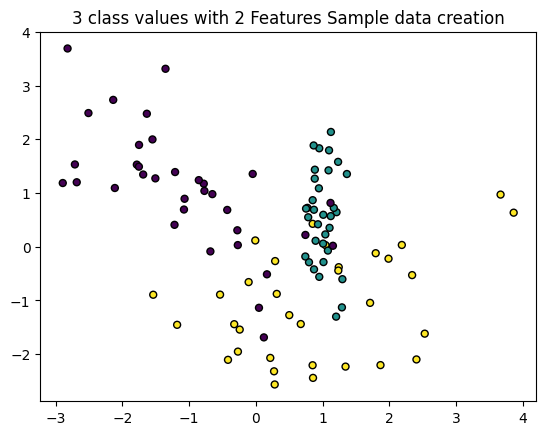

In [ ]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('3 class values with 2 Features Sample data creation')

# 2차원 시각화를 위해서 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성.
X_features, y_labels = make_classification(n_features = 2,n_redundant = 0, n_informative = 2, n_classes = 3, n_clusters_per_class = 1, random_state = 0)

# 그래프형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시됨.
plt.scatter(X_features[:,0],X_features[:,1],marker = 'o',c = y_labels,s=25,edgecolor = 'k')
plt.show()

In [ ]:
### visualize_boundary 함수 코드.
#### visualize_boundary 함수는 머신러닝 모델이 클래스 값을 예측하는 결정 기준을 색상과 경계로 나타내 모델이 어떻게 데이터 세트를 예측 / 분류하는지 잘 이해할 수 있게 해줌
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()

    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()

    # 호출 파라미터로 들어온 training 데이타로 model 학습 .
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행.
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # contourf() 를 이용하여 class boundary 를 visualization 수행.
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)
    plt.show()

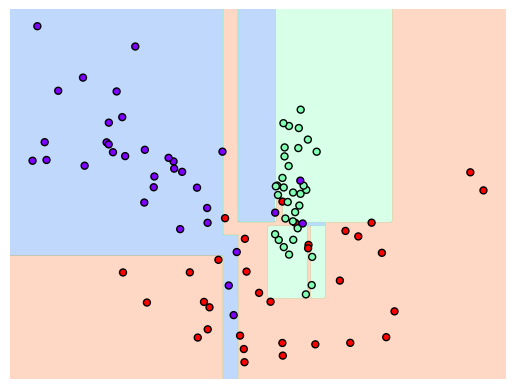

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state = 156).fit(X_features,y_labels)

visualize_boundary(dt_clf,X_features, y_labels)

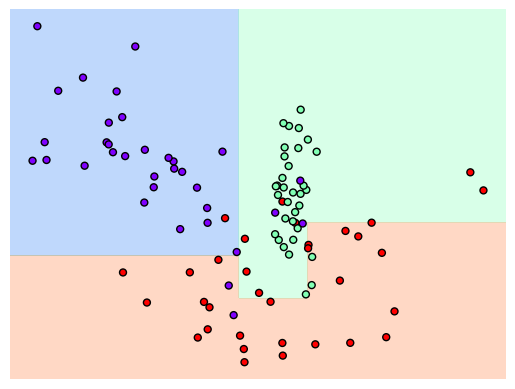

In [ ]:
# min_samples_leaf=6으로 트리 생성 조건을 제약한 결정 경계 시각화
dt_clf = DecisionTreeClassifier(min_samples_leaf=6, random_state=156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

## 결정 트리 실습 - 사용자 행동 인식 데이터 세트

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음. 이를 DataFrame으로 로드.
feature_name_df = pd.read_csv('/Users/kileylee/Desktop/ESAA/assignment/human_activity/features.txt',sep='\s+',header=None,names = ['column_index','column_name'])

# 피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:,1].values.tolist()
print('전체 피처명에서 10개만 추출:', feature_name[:10])

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [ ]:
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index']>1].count())
feature_dup_df[feature_dup_df['column_index'] > 1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [ ]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name','dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) if x[1] >0 else x[0] , axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [ ]:
import pandas as pd
def get_human_dataset():
    # 각 데이터 파일은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당
    feature_name_df = pd.read_csv('/Users/kileylee/Desktop/ESAA/assignment/human_activity/features.txt',sep='\s+',header=None,
                                  names=['colum_index','column_name'])

    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame 생성.
    new_feature_name_df = get_new_feature_name_df(feature_name_df)

    # DataFrame에 피처명을 칼럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:,1].values.tolist()

    # 학습 피처 데이터세트와 테스트 피처 데이터를 DataFrame으로 로딩. 칼럼명은 feature_name 적용
    X_train = pd.read_csv('/Users/kileylee/Desktop/ESAA/assignment/human_activity/train/X_train.txt',sep='\s+',names = feature_name)
    X_test = pd.read_csv('/Users/kileylee/Desktop/ESAA/assignment/human_activity/test/X_test.txt',sep='\s+',names = feature_name)

    # 학습 레이블과 테스트 레이블 데이터를 DataFrame으로 로딩하고 칼럼명은 action으로 부여
    y_train = pd.read_csv('/Users/kileylee/Desktop/ESAA/assignment/human_activity/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('/Users/kileylee/Desktop/ESAA/assignment/human_activity/test/y_test.txt',sep='\s+',header=None,names=['action'])

    # 로드된 학습/테스트용 DataFrame을 모두 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

In [ ]:
print('## 학습 피처 데이터셋 info()')
print (X_train.info())

## 학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [ ]:
print(y_train['action'].value_counts())

action
6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: count, dtype: int64


In [ ]:
X_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 예제 반복 시마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf = DecisionTreeClassifier(random_state = 156)
dt_clf.fit(X_train,y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test,pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

# DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n', dt_clf.get_params())

결정 트리 예측 정확도: 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 156, 'splitter': 'best'}


In [ ]:
# 결정 트리의 트리 깊이(Tree Depth)가 예측 정확도에 주는 영향
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' :[6,8,10,12,16,20,24],
    'min_samples_split' : [16]
}
grid_cv = GridSearchCV(dt_clf,param_grid = params, scoring = 'accuracy', cv = 5, verbose = 1)
grid_cv.fit(X_train,y_train)
print('GridSearchCV 최고 평균 정확도 수치:{0:.4}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:',grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치:0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [ ]:
# GridSearchCV 객체의 cv_results_ 속성을 DataFrame으로 생성 .
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

# max_depth 파라미터 값과 그때의 테스트 세트, 학습 데이터 세트의 정확도 수치 추출
cv_results_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.847662
1,8,0.854879
2,10,0.852705
3,12,0.845768
4,16,0.847127
5,20,0.848624
6,24,0.848624


In [ ]:
max_depths = [ 6, 8, 10, 12, 16, 20, 24]
# max.depth 값을 변화시키면서 그때마다 학습과 테스트 세트에서의 예측 성능 측정

for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth = depth, min_samples_split = 16, random_state = 156)
    dt_clf.fit(X_train,y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test,pred)
    print('max_depth {0}의 정확도: {1:.4f}'.format(depth,accuracy))

max_depth 6의 정확도: 0.8551
max_depth 8의 정확도: 0.8717
max_depth 10의 정확도: 0.8599
max_depth 12의 정확도: 0.8571
max_depth 16의 정확도: 0.8599
max_depth 20의 정확도: 0.8565
max_depth 24의 정확도: 0.8565


In [ ]:
# max_depth와 min_samples_split을 같이 변경하면서 정확도 성능을 튜닝
params = {
    'max_depth' : [8, 12, 16, 20],
    'min_samples_split' : [16,24]
}

grid_cv = GridSearchCV(dt_clf,param_grid = params, scoring = 'accuracy', cv = 5, verbose = 1)
grid_cv.fit(X_train,y_train)
print('GridSearchCV의 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:',grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV의 최고 평균 정확도 수치:0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [ ]:
best_dt_clf = grid_cv.best_estimator_ # 최적 하이퍼 파라미터인 max depth 8, min_samples_split 16으로 학습이 완료된 Estimator 객체
pred1 = best_dt_clf.predict(X_test)
accuracy = accuracy_score(y_test,pred1)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

결정 트리 예측 정확도:0.8717


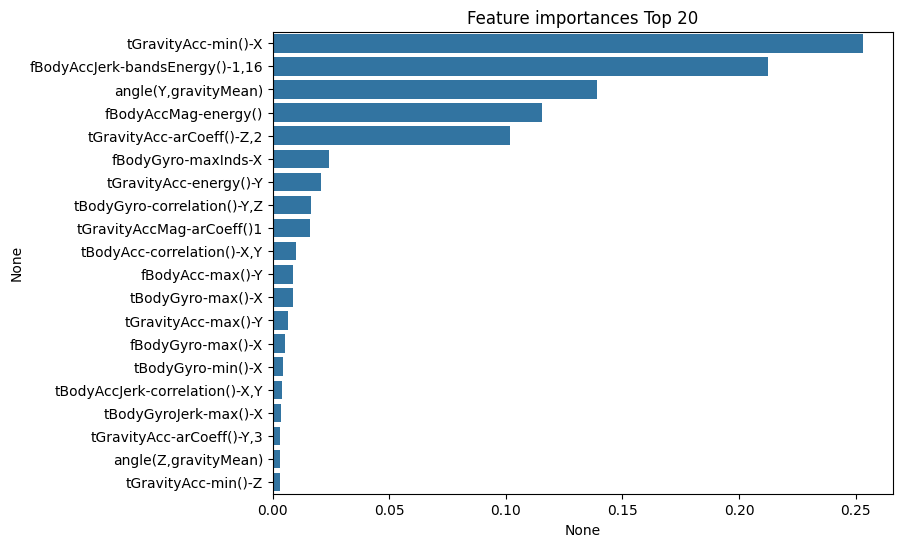

In [ ]:
import seaborn as sns
ftr_importances_values = best_dt_clf.feature_importances_

# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series 변환
ftr_importances = pd.Series(ftr_importances_values,index = X_train.columns)

# 중요도값 순으로 Series를 정렬
ftr_top20 = ftr_importances.sort_values(ascending = False)[:20]
plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y = ftr_top20.index)
plt.show()